[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


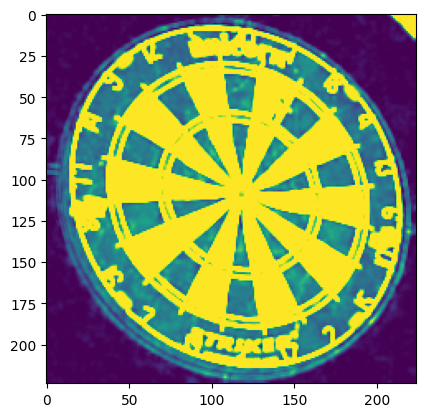

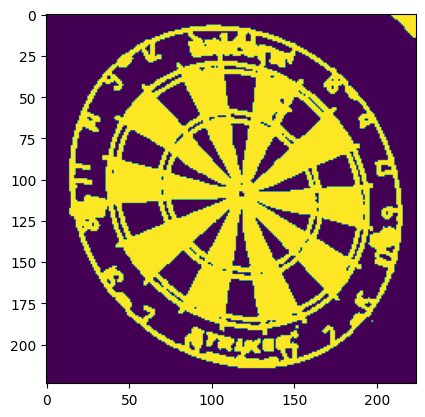

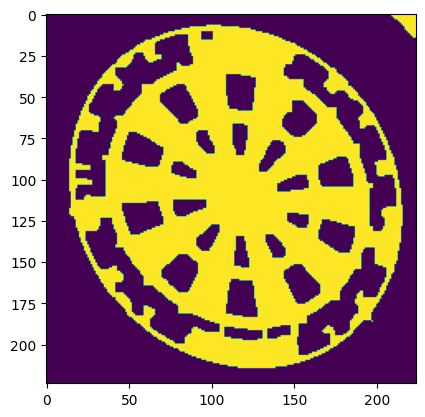

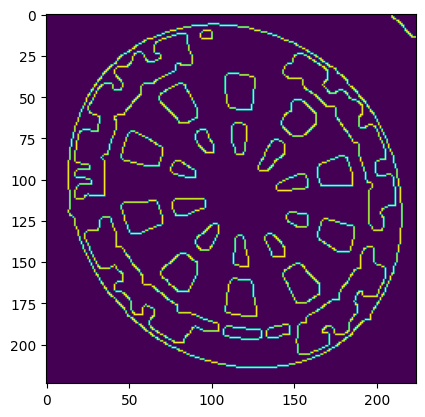

True

In [102]:
import cv2
from matplotlib import image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def get_normalized_size(center_of_mass, image_width, image_height):
    # print(center_of_mass, image_width, image_height)
    normalized_width = (center_of_mass[0] / (image_width / 100)) / 100
    normalized_height = (center_of_mass[1] / (image_height / 100)) / 100
    return normalized_width, normalized_height
    

# imagePath = './Screenshot_2.png'
imagePath = './result4.png'
image = Image.open(imagePath).convert('RGB')
width, height = image.size

color = cv2.imread(imagePath, cv2.IMREAD_COLOR)
imCalHSV = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)


kernel = np.ones((3, 3), np.float32) /1
print(kernel)
blur = cv2.filter2D(color, -1, kernel)
h, s, imCal = cv2.split(blur)
used = h
plt.imshow(used)
plt.show()

## threshold important -> make accessible
#ret, thresh = cv2.threshold(imCal, 140, 255, cv2.THRESH_BINARY_INV)
ret, thresh = cv2.threshold(used, 254, 255, cv2.THRESH_BINARY)

plt.imshow(thresh)
plt.show()

## kernel size important -> make accessible
# very important -> removes lines outside the outer ellipse -> find ellipse
kernel = np.ones((5, 5), np.uint8)
thresh2 = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(thresh2)
plt.show()

cv2.imwrite('filtered.png', thresh2)

def autocanny(imCal):
    edged = cv2.Canny(imCal, 250, 255)
    return edged
    
edges =autocanny(thresh2)
# Save the edge detected image
plt.imshow(edges)
plt.show()
cv2.imwrite('edges.png', edges)

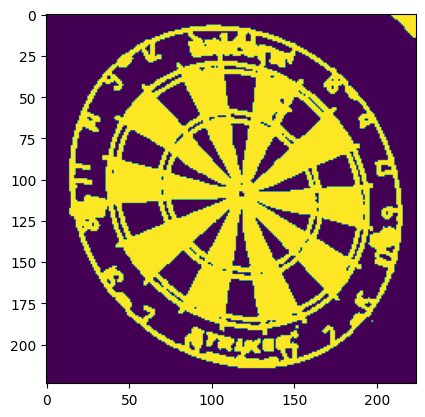

[[[209   0]]

 [[223  14]]

 [[223   0]]]


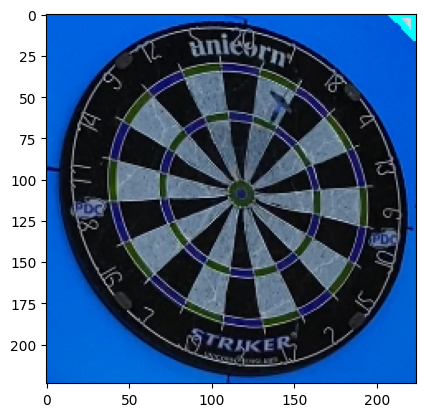

(0.509892702102661, 0.49252125195094515)
0


In [103]:
img = cv2.imread("edges.png", 0)
img2 = cv2.imread(imagePath)

used = thresh
plt.imshow(used)
plt.show()

contours, hierarchy = cv2.findContours(used, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE )

minThresE = 1000
maxThresE = 1500000/4

ellipseWidth = 0
center_ellipse = None
elipse = None
## contourArea threshold important -> make accessible
triangles = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.09*cv2.arcLength(cnt, True), True)
    if len(approx) == 3:
        print(approx)
        triangles.append(approx)
        img2 = cv2.drawContours(img2, [cnt], -1, (0,255,255), 3)
        
    # if minThresE < cv2.contourArea(cnt) < maxThresE:
    #     elipse = cv2.fitEllipse(cnt)
    #     cv2.ellipse(img, elipse, (15, 15, 0), 2)

    #     x, y = elipse[0]
    #     a, b = elipse[1]
    #     angle = elipse[2]
    #     print(x,y,width,height, elipse)

    #     center_ellipse = (x, y)

    #     coordinates = get_normalized_size((x,y),img.shape[0], img.shape[1])
    #     ellipseWidth = int(max(elipse[1]))  # Width is the larger of the two axis lengths

    #     a = a / 2
    #     b = b / 2

    #     cv2.ellipse(img2, elipse,(255, 255, 255), 1)

# largest_triangle = max(triangles, key=cv2.contourArea)
# img2 = cv2.drawContours(img2, [largest_triangle], -1, (0,255,255), 3)
plt.imshow(img2)
plt.show()
cv2.imwrite("result2.png", img)
print(coordinates)

print(ellipseWidth)
halfWidth = int(ellipseWidth/2)

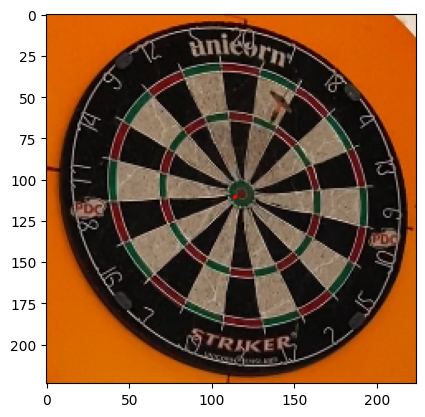

In [59]:
from matplotlib import image as mpimg
plt.imshow(mpimg.imread(imagePath))
plt.scatter(center_ellipse[0], center_ellipse[1], s=10, marker='+', color="red")
plt.show()

In [4]:
# x = int(center_ellipse[0])
# y = int(center_ellipse[1])
# print(x,y, halfWidth)
# img = cv2.imread("./darts/Screenshot_2.png")
# crop_img = img[y-halfWidth:y+halfWidth, x-halfWidth:x+halfWidth]

# cv2.imwrite("./result4.png", crop_img)

# plt.imshow(mpimg.imread("./result4.png"))
# plt.show()

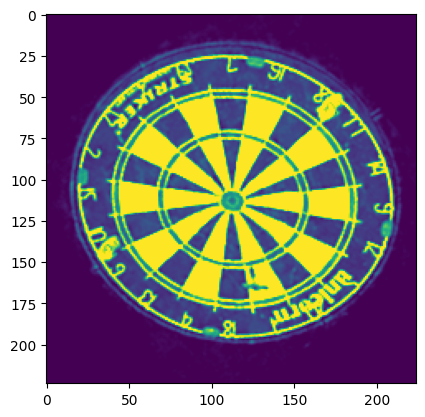

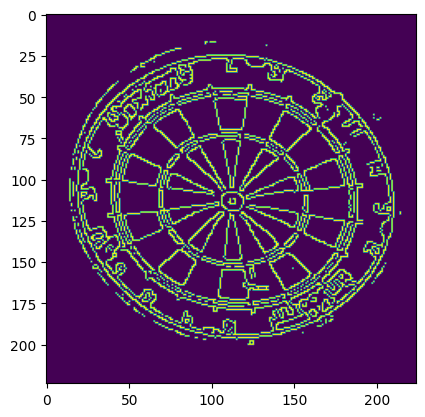

[[[-3.8000000e+01  2.6005406e+00]]

 [[ 1.5900000e+02  8.2030475e-01]]

 [[ 6.0000000e+00  2.3212879e+00]]

 [[ 5.7000000e+01  1.9896753e+00]]

 [[-1.0000000e+00  2.3561945e+00]]

 [[ 3.0000000e+00  2.3387411e+00]]

 [[ 1.0000000e+00  2.3561945e+00]]

 [[-3.6000000e+01  2.5830872e+00]]

 [[ 5.5000000e+01  2.0071287e+00]]

 [[ 1.5800000e+02  7.8539819e-01]]

 [[ 1.2700000e+02  1.3962634e-01]]

 [[ 1.2800000e+02  1.4311700e+00]]]
-997 -1733
-1354 1480
-1466 -1359
-1850 -761
-1413 -1414
-1440 -1387
-1414 -1413
-1029 -1715
-1835 -795
-1302 1525
-152 1998
-1962 405


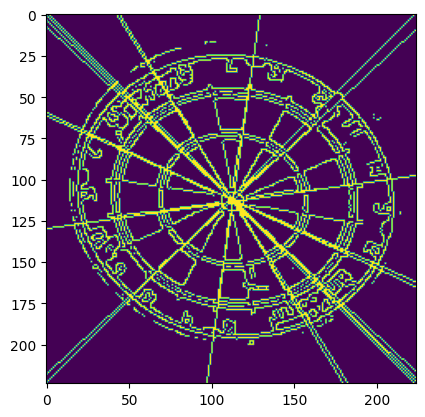

In [5]:
color = cv2.imread("warped.png", cv2.IMREAD_COLOR)
imCalHSV = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
kernel = np.ones((2, 2), np.float32) /1
blur = cv2.filter2D(color, -1, kernel)
h, s, imCal = cv2.split(blur)
plt.imshow(h)
plt.show()

edges =autocanny(h)
# Save the edge detected image
plt.imshow(edges)
plt.show()

lines = cv2.HoughLines(edges, 1, np.pi / 180, 80, 130)
print(lines)

## sector angles important -> make accessible
for line in lines:
# split between horizontal and vertical lines (take only lines in certain range)
    for rho, theta in line:
# split between horizontal and vertical lines (take only lines in certain range)
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 2000 * (-b))
        y1 = int(y0 + 2000 * (a))
        x2 = int(x0 - 2000 * (-b))
        y2 = int(y0 - 2000 * (a))
        print(x1,y1)
        cv2.line(edges, (x1, y1), (x2, y2), (255, 255, 255), 1)

plt.imshow(edges)
plt.show()


In [6]:
from collections import defaultdict

def segment_by_angle_kmeans(lines, k=2, **kwargs):
   """Groups lines based on angle with k-means."""

   default_criteria_type = cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER
   criteria = kwargs.get('criteria', (default_criteria_type, 10, 1.0))
   flags = kwargs.get('flags', cv2.KMEANS_RANDOM_CENTERS)
   attempts = kwargs.get('attempts', 10)

   angles = np.array([line[0][1] for line in lines])
   pts = np.array([[np.cos(2*angle), np.sin(2*angle)] for angle in angles], dtype=np.float32)

   labels, centers = cv2.kmeans(pts, k, None, criteria, attempts, flags)[1:]
   labels = labels.reshape(-1)

   segmented = defaultdict(list)
   for i, line in enumerate(lines):
       segmented[labels[i]].append(line)
   segmented = list(segmented.values())
   return segmented

def intersection(line1, line2):
   rho1, theta1 = line1[0]
   rho2, theta2 = line2[0]
   A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
   b = np.array([[rho1], [rho2]])
   x0, y0 = np.linalg.solve(A, b)
   x0, y0 = int(np.round(x0).item()), int(np.round(y0).item())
   return [[x0, y0]]

def segmented_intersections(lines):
   intersections = []
   for i, group in enumerate(lines[:-1]):
       for next_group in lines[i+1:]:
           for line1 in group:
               for line2 in next_group:
                  intersections.append(intersection(line1, line2))
   return intersections

# Segment the lines
segmented = segment_by_angle_kmeans(lines)

# Find the intersections
intersections = segmented_intersections(segmented)
coords_array = np.array(intersections)
avg_x = np.mean(coords_array[:, 0, 0])
avg_y = np.mean(coords_array[:, 0, 1])
print(avg_x,avg_y)

112.28125 112.53125


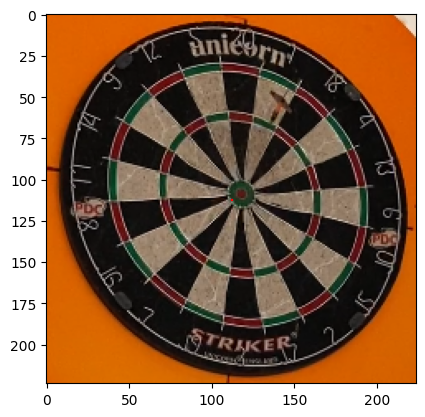

In [7]:
from matplotlib import image as mpimg
plt.imshow(mpimg.imread("./darts/result4.png"))
plt.scatter(avg_x, avg_y, s=1, marker='+', color="red")
plt.show()

In [104]:
ellipse_center = tuple(map(int, elipse[0])) 
# ellipse_center = (int(avg_x),int(avg_y))
major_axis = int(elipse[1][0])  # Major axis length
minor_axis = int(elipse[1][1])  # Minor axis length
rotation_angle = elipse[2]  # Angle of rotation

# Calculate the scaling factor to turn the ellipse into a circle
scaling_factor = major_axis / minor_axis

# Create an affine transformation matrix
M = cv2.getRotationMatrix2D(ellipse_center, -rotation_angle, scaling_factor)

img = cv2.imread(imagePath)
# Apply the transformation to the original image
transformed_image = cv2.warpAffine(img, M, (width, height))
plt.imshow(transformed_image)
plt.show()
cv2.imwrite("warped.png", transformed_image)


TypeError: 'NoneType' object is not subscriptable

In [ ]:
from matplotlib import image as mpimg
plt.imshow(mpimg.imread("warped.png"))
plt.scatter(avg_x, avg_y, s=1, marker='+', color="red")
plt.show()

In [ ]:
# mask = np.zeros_like(transformed_image, dtype=np.uint8)

# # Define the center and radius of the dartboard (in your case, the transformed circle)
# circle_center = (int(avg_x),int(avg_y))
# circle_radius = int(major_axis / 2)  # Assuming the circle is a transformed ellipse

# # Create a blank canvas with the same dimensions as the transformed image
# num_rings = 10  # Number of rings
# num_sectors = 20  # Number of sectors
# ring_spacing = circle_radius / num_rings

# # Overlay polar system on the blank canvas
# for r in range(1, num_rings + 1):
#     cv2.circle(overlay, circle_center, int(r * ring_spacing), (0, 255, 0), 2)

# for s in range(num_sectors):
#     angle = (360 / num_sectors) * s
#     radians = np.deg2rad(angle)
#     x1 = int(circle_center[0] + circle_radius * np.cos(radians))
#     y1 = int(circle_center[1] + circle_radius * np.sin(radians))
#     cv2.line(overlay, circle_center, (x1, y1), (0, 255, 0), 2)

# # Add the overlay to the transformed image
# result_image = cv2.addWeighted(transformed_image, 1, overlay, 0.5, 0)

# # Display the result using Matplotlib
# plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

In [ ]:
image = cv2.imread('warped.png')

# Create a blank canvas for the polar grid
polar_canvas = np.zeros_like(image)

# Define the center and radius of the dartboard in the image
center = (int(avg_x),int(avg_y))
radius = min(center)

# Define the number of circles in the polar grid
num_circles = 5

# Create a polar grid
for i in range(1, num_circles + 1):
    cv2.circle(polar_canvas, center, int(radius * i / num_circles), (0, 0, 255), 2)

# Define the number of sectors in the dartboard
num_sectors = 20

# Create sector lines
for i in range(num_sectors):
    angle = i * (360 / num_sectors)
    radian = np.deg2rad(angle)
    end_point = (int(center[0] + radius * np.cos(radian)), int(center[1] + radius * np.sin(radian)))
    cv2.line(polar_canvas, center, end_point, (0, 0, 255), 2)

# Convert the polar canvas to a transparent overlay
overlay = polar_canvas.copy()
overlay[polar_canvas == 0] = 0  # Set non-red pixels to transparent

# Overlay the polar grid on the image
result = cv2.addWeighted(image, 1, overlay, 0.5, 0)

# Display the result
cv2.imwrite("result22.png", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image = cv2.imread("./darts/result4.png")

# Create a blank canvas for the polar grid
polar_canvas = np.zeros_like(image)

# Define the center and radius of the dartboard in the image
center = (int(avg_x),int(avg_y))
radius = min(center)

# Define the number of circles in the polar grid
num_circles = 5

# Create a polar grid
for i in range(1, num_circles + 1):
    cv2.circle(polar_canvas, center, int(radius * i / num_circles), (0, 0, 255), 2)

# Define the number of sectors in the dartboard
num_sectors = 20

# Create sector lines
for i in range(num_sectors):
    angle = i * (360 / num_sectors)
    radian = np.deg2rad(angle)
    end_point = (int(center[0] + radius * np.cos(radian)), int(center[1] + radius * np.sin(radian)))
    cv2.line(polar_canvas, center, end_point, (0, 0, 255), 2)

# Convert the polar canvas to a transparent overlay
overlay = polar_canvas.copy()
overlay[polar_canvas == 0] = 0  # Set non-red pixels to transparent

# Overlay the polar grid on the image
result = cv2.addWeighted(image, 1, overlay, 0.5, 0)

# Display the result
cv2.imwrite("result44.png", result)
cv2.waitKey(0)
cv2.destroyAllWindows()